In [1]:
import numpy as np
import pandas as pd
import os
import csv
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.shape

(891, 12)

In [4]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
train_df = train_df.drop('Name', axis=1,)
train_df = train_df.drop('Ticket', axis=1,)
train_df = train_df.drop('Fare', axis=1,)
train_df = train_df.drop('Cabin', axis=1,)

In [6]:
import matplotlib.pyplot as plot
import seaborn as sns

<Axes: xlabel='Sex', ylabel='Survived'>

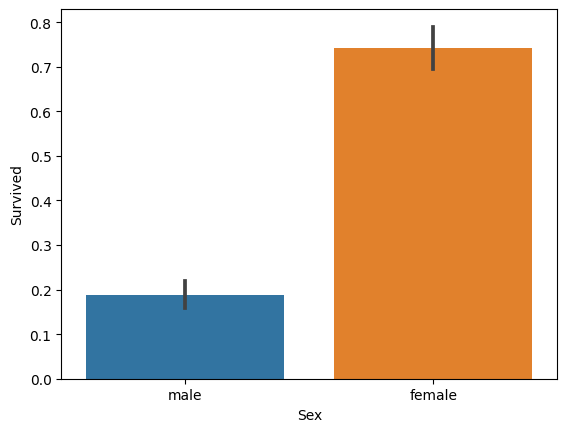

In [7]:
sns.barplot(data= train_df, x="Sex", y ="Survived")

<Axes: xlabel='Embarked', ylabel='Survived'>

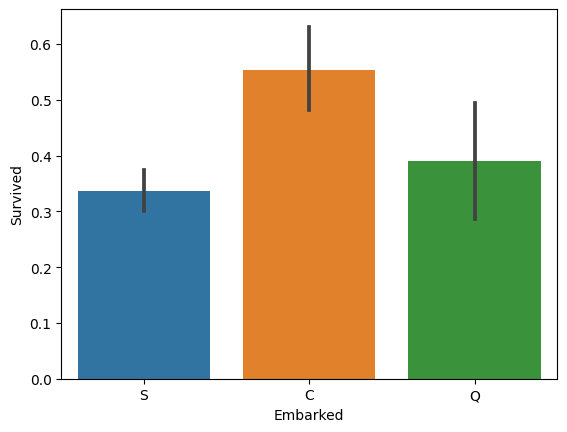

In [8]:
sns.barplot(data= train_df, x="Embarked", y ="Survived")

<Axes: xlabel='Pclass', ylabel='Survived'>

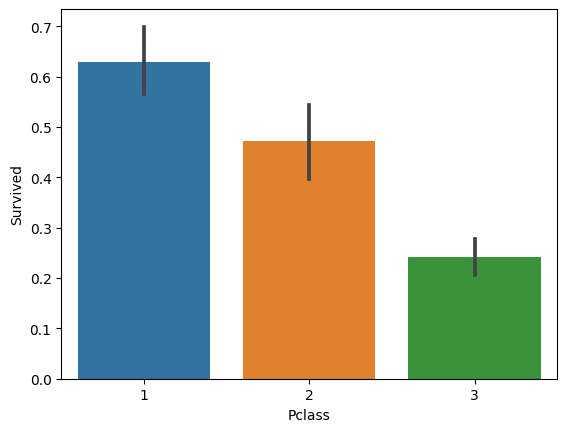

In [9]:
sns.barplot(data= train_df, x="Pclass", y ="Survived")

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from collections import Counter
from sklearn.model_selection import cross_validate

In [11]:
train_df['Embarked'].isna().sum()

2

In [12]:
train_df["Embarked"] = train_df["Embarked"].fillna("S")

In [13]:
train_df.Embarked.replace(['S', 'C', 'Q'], [1, 2, 3], inplace=True)

In [14]:
train_df['Age'].isna().sum()

177

In [15]:
train_df["Age"] = train_df["Age"].fillna(train_df["Age"].median())

In [16]:
train_df.Sex.replace(['male', 'female'], [1,0], inplace = True)

In [17]:
train_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.0,1,0,1
1,2,1,1,0,38.0,1,0,2
2,3,1,3,0,26.0,0,0,1
3,4,1,1,0,35.0,1,0,1
4,5,0,3,1,35.0,0,0,1


In [18]:
X = np.array(train_df.filter(['Pclass','Sex','Embarked','SipSp', 'Parch', 'Age'], axis=1))

In [19]:
y = np.array(train_df.filter(['Survived'], axis=1))

In [20]:
X_1, X_test, y_1, y_test = train_test_split(X,y, test_size=0.2)
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.2)

In [21]:
final_scores = []
for i in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_tr, y_tr)
    pred = knn.predict(X_cv)
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    final_scores.append(acc)
    

In [22]:
optimal_k = final_scores.index(max(final_scores))
print(optimal_k)


3


In [23]:
df_test = pd.read_csv('../input/titanic/test.csv')
df_test = df_test.drop('Name', axis=1,)
df_test = df_test.drop('Ticket', axis=1,)
df_test = df_test.drop('Fare', axis=1,)
df_test = df_test.drop('Cabin', axis=1,)
df_test["Age"] = df_test["Age"].fillna(train_df["Age"].median())


In [24]:
df_test1 = pd.read_csv('../input/titanic/test.csv')
df_test1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [25]:
print(df_test["Embarked"].mode())
df_test["Embarked"] = df_test["Embarked"].fillna("S")
df_test.Embarked.replace(['S', 'C', 'Q'], [1, 2, 3], inplace=True)
df_test.Sex.replace(['male', 'female'], [1,0], inplace=True)

0    S
Name: Embarked, dtype: object


In [26]:
X_test = np.array(df_test.filter(['Pclass','Sex','Embarked','SipSp','Parch','Age'], axis=1))
knn = KNeighborsClassifier(n_neighbors = optimal_k)
knn.fit(X_tr, y_tr)
pred = knn.predict(X_test)
print(pred)

[0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0
 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0
 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0
 1 1 0 1 0 0 0 1 0 0 0]


In [27]:
df_test['Survived'] = pd.Series(pred, index=df_test.index)

In [28]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,892,3,1,34.5,0,0,3,0
1,893,3,0,47.0,1,0,1,0
2,894,2,1,62.0,0,0,3,0
3,895,3,1,27.0,0,0,1,1
4,896,3,0,22.0,1,1,1,1


In [29]:
final_df = df_test.filter(['PassengerId','Survived'], axis=1)
final_df.shape

(418, 2)

In [30]:
final_df.to_csv("titanic_pred.csv", encoding='utf-8')